# Project Optima 3000 Turbo Trader

**Student:** Hannes  
**Course:** AI001  
**Date:** 20/6-2025

## Problem Statement
Classification problem aiming to predict which position Long/Neutral/Short to have in Nasdaq 100

## Dataset
- **Source:** Nasdaq 100 & VXN https://www.investing.com/indices/nq-100-historical-data & https://www.investing.com/indices/cboe-nasdaq-100-voltility-historical-data
- **Size:** 5261/37
- **Domain:** Tabular

## Objectives
- Higher risk adjusted returns than the benchmark Nasdaq 100

In [281]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# ML libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


# 1. Data Exploration

Let's start by exploring our dataset to understand its structure and characteristics.

In [282]:
# Load your dataset here
# Example with sample data - replace with your actual dataset
from sklearn.datasets import make_classification
import pandas as pd

# Generate sample dataset (replace this with your actual data loading)
try:
    df = pd.read_csv('/Users/hannes.helin/Desktop/repos/ns/ai001-p1/data/ndq3.csv', index_col='Date', parse_dates=True)
    print("✅ Step 1: Successfully loaded ndq.csv.")
except FileNotFoundError:
    print("🛑 Error: 'ndq.csv' not found. Please check the file name and location.")


# Define the name of the column you want to predict
TARGET_COLUMN = 'Position'

# X is your DataFrame of features. It includes ALL columns EXCEPT the target column.
X = df.drop(columns=[TARGET_COLUMN])

# y is your target variable. It is ONLY the 'Position' column.
y = df[TARGET_COLUMN]

# --- VERIFY THE CREATION ---
print("--- X (Features) and y (Target) Created ---")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print("\nFirst 5 rows of X:")
print(X.head())
print("\nFirst 5 rows of y:")
print(y.head())

# Convert to DataFrame
df = pd.DataFrame(X)
df['position'] = y

print(f"Dataset shape: {df.shape}")
df.head()

✅ Step 1: Successfully loaded ndq.csv.
--- X (Features) and y (Target) Created ---
Shape of X: (5261, 37)
Shape of y: (5261,)

First 5 rows of X:
            NDQ Close  NDQ Open  NDQ High   NDQ Low     NDQ Vol.  \
Date                                                               
2021-12-31   16320.08  16411.26  16464.62  16317.26  144780000.0   
2021-12-30   16429.10  16485.40  16569.62  16415.12  125580000.0   
2021-12-29   16491.01  16510.63  16548.92  16396.16  133190000.0   
2021-12-28   16488.66  16602.92  16607.19  16458.49  136370000.0   
2021-12-27   16567.50  16361.07  16567.64  16361.07  154760000.0   

            NDQ Change %   NDQ MA5  NDQ MA10  NDQ MA20  NDQ Low5  NDQ Low10  \
Date                                                                          
2021-12-31         -0.01  16459.27  16220.01  16155.54  16317.26   15508.74   
2021-12-30          0.00  16456.90  16174.39  16139.07  16188.02   15508.74   
2021-12-29          0.00  16407.10  16160.44  16111.51  15947

,NDQ Close,NDQ Open,NDQ High,NDQ Low,NDQ Vol.,NDQ Change %,NDQ MA5,NDQ MA10,NDQ MA20,NDQ Low5,NDQ Low10,NDQ Low20,NDQ Max5,NDQ Max10,NDQ Max20,NDQ ATR5,NDQ ATR10,NDQ ATR20,NDQ TR,VXN Close,VXN Open,VXN High,VXN Low,VXN Change %,VXN MA5,VXN MA10,VXN MA20,VXN Low5,VXN Low10,VXN Low20,VXN Max5,VXN Max10,VXN Max20,VXN ATR5,VXN ATR10,VXN ATR20,VXN TR,position
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-12-31,16320.08,16411.26,16464.62,16317.26,144780000.0,-0.01,16459.27,16220.01,16155.54,16317.26,15508.74,15508.74,16607.19,16607.19,16607.19,172.55,225.11,297.37,147.36,21.20,21.38,21.83,21.03,-0.01,21.42,22.48,24.02,20.98,20.92,20.92,22.84,31.04,34.82,1.11,1.77,2.52,0.80,-1
2021-12-30,16429.10,16485.40,16569.62,16415.12,125580000.0,0.00,16456.90,16174.39,16139.07,16188.02,15508.74,15508.74,16607.19,16607.19,16607.19,179.20,264.16,304.77,154.50,21.38,21.27,21.77,20.98,0.00,21.45,23.01,24.63,20.98,20.92,20.92,22.84,31.04,36.64,0.95,2.00,2.90,0.79,-1
2021-12-29,16491.01,16510.63,16548.92,16396.16,133190000.0,0.00,16407.10,16160.44,16111.51,15947.56,15508.74,15508.74,16607.19,16607.19,16607.19,196.04,304.14,325.21,152.76,21.28,21.55,22.60,21.10,-0.01,21.44,23.40,25.05,20.92,20.92,20.92,22.84,31.04,36.64,1.10,2.35,3.01,1.50,-1
2021-12-28,16488.66,16602.92,16607.19,16458.49,136370000.0,0.00,16306.16,16102.83,16093.75,15617.48,15508.74,15508.74,16607.19,16607.19,16607.19,241.51,322.84,336.61,148.70,21.54,21.72,22.47,21.51,-0.01,21.61,23.61,25.54,20.92,20.92,20.92,25.24,31.04,36.64,1.42,2.66,3.29,0.96,-1
2021-12-27,16567.50,16361.07,16567.64,16361.07,154760000.0,0.02,16133.95,16062.22,16089.28,15508.74,15508.74,15508.74,16567.64,16567.64,16567.64,270.32,333.68,349.76,259.43,21.72,22.13,22.84,21.57,0.02,22.29,23.99,25.83,20.92,20.92,20.92,27.96,31.04,36.64,1.83,2.89,3.46,1.52,-1


In [283]:
# Basic dataset information
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Target distribution:\n{df['position'].value_counts()}")

# Statistical summary
df.describe()

Dataset Info:
Shape: (5261, 38)
Missing values: 1346
Target distribution:
position
-1    1944
 1    1872
 0    1445
Name: count, dtype: int64


,NDQ Close,NDQ Open,NDQ High,NDQ Low,NDQ Vol.,NDQ Change %,NDQ MA5,NDQ MA10,NDQ MA20,NDQ Low5,NDQ Low10,NDQ Low20,NDQ Max5,NDQ Max10,NDQ Max20,NDQ ATR5,NDQ ATR10,NDQ ATR20,NDQ TR,VXN Close,VXN Open,VXN High,VXN Low,VXN Change %,VXN MA5,VXN MA10,VXN MA20,VXN Low5,VXN Low10,VXN Low20,VXN Max5,VXN Max10,VXN Max20,VXN ATR5,VXN ATR10,VXN ATR20,VXN TR,position
count,5261.000000,5261.000000,5261.000000,5261.000000,3.915000e+03,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000
mean,3908.493039,3907.715978,3934.967860,3878.305083,2.564950e+08,0.000462,3903.229561,3896.717305,3883.898067,3821.574818,3776.750441,3708.975938,3972.173169,3996.072733,4027.146200,63.578605,63.527339,63.338272,63.593855,24.767966,24.878854,25.678293,24.084377,0.001669,24.780304,24.796630,24.826018,22.838109,22.086138,21.199627,27.276765,28.477126,30.140139,1.876216,1.883247,1.888008,1.863667,-0.013686
std,3418.649007,3417.264915,3438.361566,3393.761378,1.757998e+08,0.016153,3409.549723,3398.359890,3376.735692,3341.279760,3298.391927,3231.445310,3463.552401,3477.559997,3494.047676,68.912355,66.834732,64.298229,75.495380,11.716724,11.711515,11.908673,11.570386,0.062133,11.641421,11.585622,11.503755,10.903689,10.502031,10.071700,12.630020,13.111182,13.783904,1.742873,1.660743,1.570554,1.982104,0.851638
min,804.640000,800.920000,825.120000,795.250000,5.047000e+07,-0.120000,814.430000,833.480000,854.860000,795.250000,795.250000,795.250000,852.680000,891.120000,932.910000,12.430000,13.800000,15.440000,6.950000,10.310000,10.310000,10.970000,9.660000,-0.270000,10.960000,11.480000,11.920000,9.660000,9.660000,9.660000,12.240000,12.830000,13.940000,0.000000,0.220000,0.420000,0.000000,-1.000000
25%,1605.470000,1606.840000,1619.020000,1591.770000,1.564050e+08,-0.010000,1605.160000,1605.730000,1604.520000,1572.440000,1558.170000,1543.040000,1634.120000,1644.380000,1681.140000,26.540000,26.850000,27.160000,24.590000,16.670000,16.780000,17.380000,16.220000,-0.030000,16.800000,16.740000,16.810000,15.530000,14.920000,14.540000,18.380000,19.160000,20.250000,1.060000,1.110000,1.160000,0.900000,-1.000000
50%,2316.810000,2320.640000,2331.630000,2300.250000,1.916700e+08,0.000000,2317.700000,2315.720000,2307.550000,2274.150000,2254.880000,2206.300000,2363.360000,2375.260000,2403.520000,39.480000,39.970000,40.260000,38.160000,20.690000,20.760000,21.690000,19.970000,0.000000,20.760000,20.730000,20.690000,18.900000,18.330000,17.590000,23.170000,23.910000,25.600000,1.450000,1.480000,1.500000,1.390000,0.000000
75%,4808.680000,4814.210000,4832.940000,4794.290000,2.766100e+08,0.010000,4808.920000,4806.540000,4797.700000,4760.070000,4721.410000,4656.510000,4860.680000,4886.320000,4895.500000,66.240000,66.330000,65.280000,67.010000,28.440000,28.450000,29.530000,27.480000,0.030000,28.350000,28.300000,28.480000,25.830000,25.020000,24.010000,31.320000,32.810000,35.280000,2.110000,2.110000,2.070000,2.210000,1.000000
max,16573.340000,16644.770000,16764.850000,16523.830000,1.970000e+09,0.130000,16459.270000,16334.360000,16253.800000,16317.260000,16012.780000,15877.270000,16764.850000,16764.850000,16764.850000,742.880000,623.290000,515.210000,1001.650000,80.640000,80.570000,86.520000,73.860000,0.600000,72.630000,69.350000,66.420000,66.220000,62.230000,59.230000,86.520000,86.520000,86.520000,55.850000,55.850000,55.850000,55.850000,1.000000


/var/folders/nt/yqmvj3r13ssg5p7yh94jr8lw0000gp/T/ipykernel_84110/1447361382.py:17: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



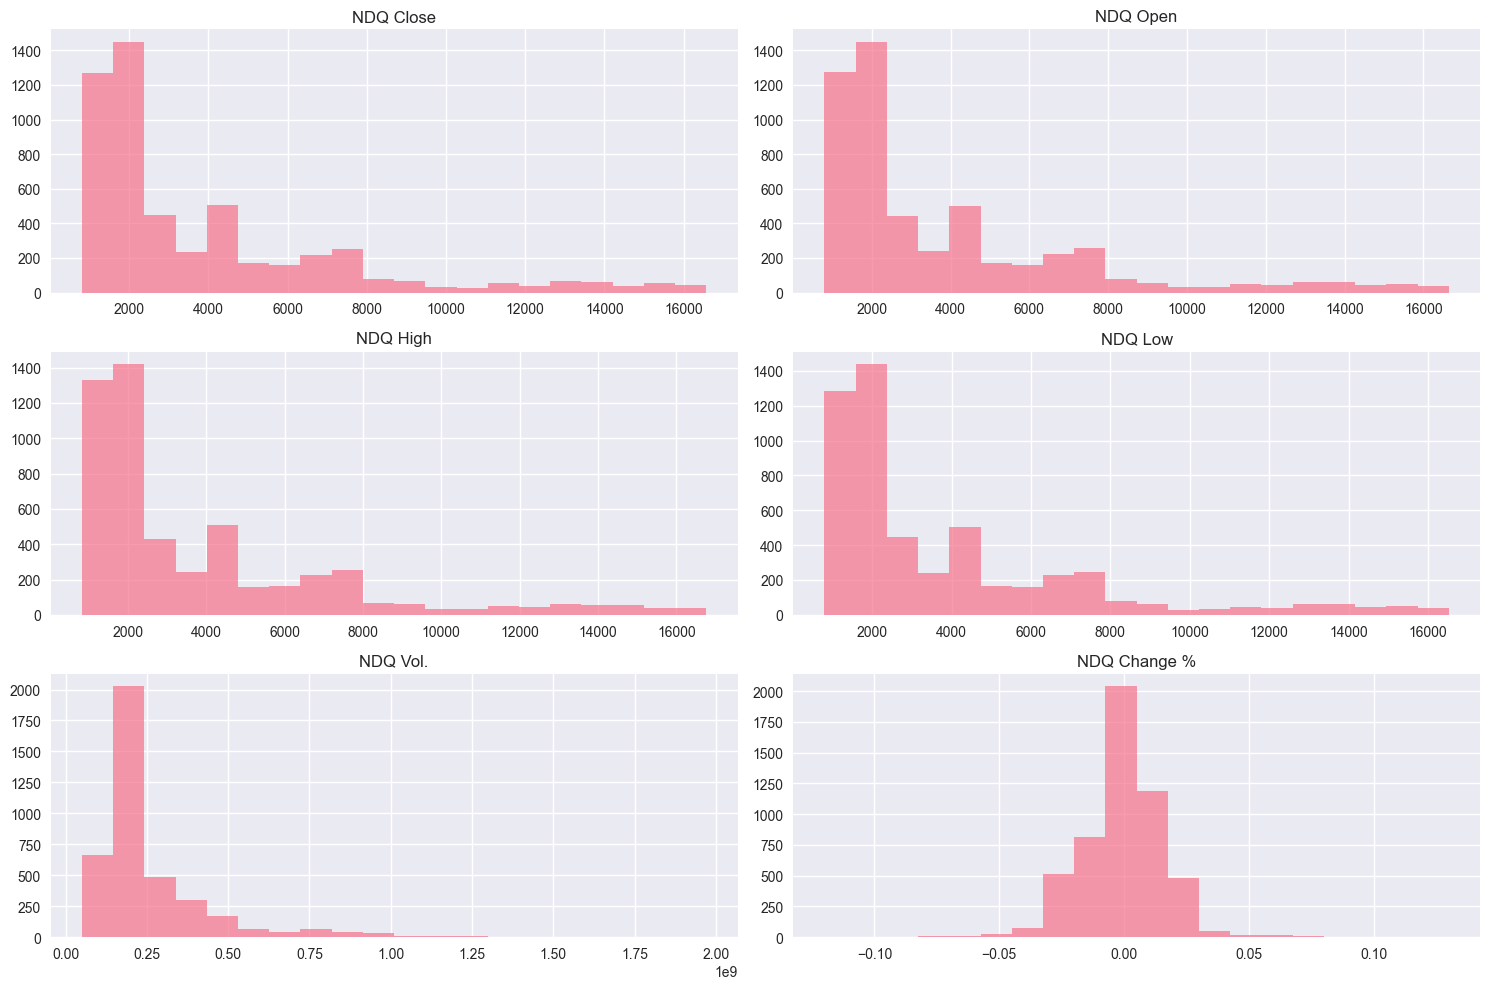

In [284]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
features_to_plot = X.columns[:6].tolist() 

# Target distribution
df['position'].value_counts().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Target Distribution')
axes[0,0].set_xlabel('Target Class')
axes[0,0].set_ylabel('Count')

# Feature correlations
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[0,1])
axes[0,1].set_title('Feature Correlations')

# Feature distributions
df[features_to_plot].hist(bins=20, ax=axes[1,0], alpha=0.7)
axes[1,0].set_title('Feature Distributions (First 4)')

# Box plot
df.boxplot(features_to_plot , ax=axes[1,1])
axes[1,1].set_title('Box Plot (First 5 Features)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [285]:
# Interactive plotly visualization
# Note: If this fails, run: uv add nbformat
features_to_plot = X.columns[:6].tolist() 
try:
    fig = px.scatter_matrix(
        df[features_to_plot + ['position']], 
        dimensions=features_to_plot,
        color='position',
        title='Interactive Feature Scatter Matrix'
    )
    fig.show()
except ValueError as e:
    if "nbformat" in str(e):
        print("Please install nbformat for plotly: run 'uv add nbformat' then restart kernel")
        # Fallback to matplotlib
        pd.plotting.scatter_matrix(
            df[features_to_plot], 
            c=df['position'], 
            figsize=(12, 8), 
            alpha=0.7
        )
        plt.suptitle('Feature Scatter Matrix (Matplotlib Fallback)')
        plt.show()
    else:
        raise e

# 2. Methodology

## Data Splitting Strategy
- **Training Set:** 60% for model training
- **Validation Set:** 20% for hyperparameter tuning
- **Test Set:** 20% for final evaluation

## Models to Compare
1. **Logistic Regression** (Baseline)
2. **Random Forest** (Ensemble method)
3. **Support Vector Machine** (Kernel-based)

## Evaluation Metrics
- Accuracy
- Precision, Recall, F1-score
- Confusion Matrix

In [286]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assume 'df' is your fully labeled and cleaned DataFrame
df.sort_index(inplace=True) # Ensure it's sorted
df.dropna(inplace=True)    # Ensure no NaNs

# --- Block 1: Prepare features and target (This part stays the same) ---
#print("--- Preparing X and y ---")
X = df.drop('position', axis=1) # Note: Case-sensitive, 'Position' not 'position'
y = df['position']


# --- Block 2: Split the data (THIS IS THE MODIFIED PART) ---
print("\n--- Performing Chronological Split ---")

# Get the total number of rows
n_samples = len(X)

# Define the split sizes
train_size = 0.6
val_size = 0.2
# The test size is implicitly the remaining 0.2

# Calculate the integer index for where the splits should occur
train_end_idx = int(n_samples * train_size)
validation_end_idx = train_end_idx + int(n_samples * val_size)

# Use .iloc to slice the DataFrames by their integer position, preserving chronological order
X_train = X.iloc[:train_end_idx]
y_train = y.iloc[:train_end_idx]

X_val = X.iloc[train_end_idx:validation_end_idx]
y_val = y.iloc[train_end_idx:validation_end_idx]

X_test = X.iloc[validation_end_idx:]
y_test = y.iloc[validation_end_idx:]


# --- Block 3: Scale features (This part stays the same) ---
print("\n--- Scaling Features ---")
scaler = StandardScaler()

# Fit on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test data with the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# --- Verification ---
print("\n--- Verification of Shapes ---")
print(f"Training set:   {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set:       {X_test.shape}")


--- Performing Chronological Split ---

--- Scaling Features ---

--- Verification of Shapes ---
Training set:   (2349, 37)
Validation set: (783, 37)
Test set:       (783, 37)


# 3. Model Implementation

Let's implement and train multiple models for comparison.

In [287]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=500, random_state=42, max_depth=10, min_samples_leaf=200),
    'SVM': SVC(random_state=42, C=1, probability=True)
}

# Train models and store results
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    train_pred = model.predict(X_train_scaled)
    val_pred = model.predict(X_val_scaled)
    
    # Store results
    results[name] = {
        'model': model,
        'train_accuracy': accuracy_score(y_train, train_pred),
        'val_accuracy': accuracy_score(y_val, val_pred),
        'val_predictions': val_pred
    }
    
    print(f"Train Accuracy: {results[name]['train_accuracy']:.4f}")
    print(f"Validation Accuracy: {results[name]['val_accuracy']:.4f}")


Training Logistic Regression...
Train Accuracy: 0.4568
Validation Accuracy: 0.3946

Training Random Forest...
Train Accuracy: 0.4977
Validation Accuracy: 0.4955

Training SVM...
Train Accuracy: 0.5334
Validation Accuracy: 0.3142


# 4. Results and Analysis

Let's analyze and compare the performance of our models.

Model Comparison:
                 Model  Train Accuracy  Validation Accuracy
0  Logistic Regression        0.456790             0.394636
1        Random Forest        0.497659             0.495530
2                  SVM        0.533418             0.314176


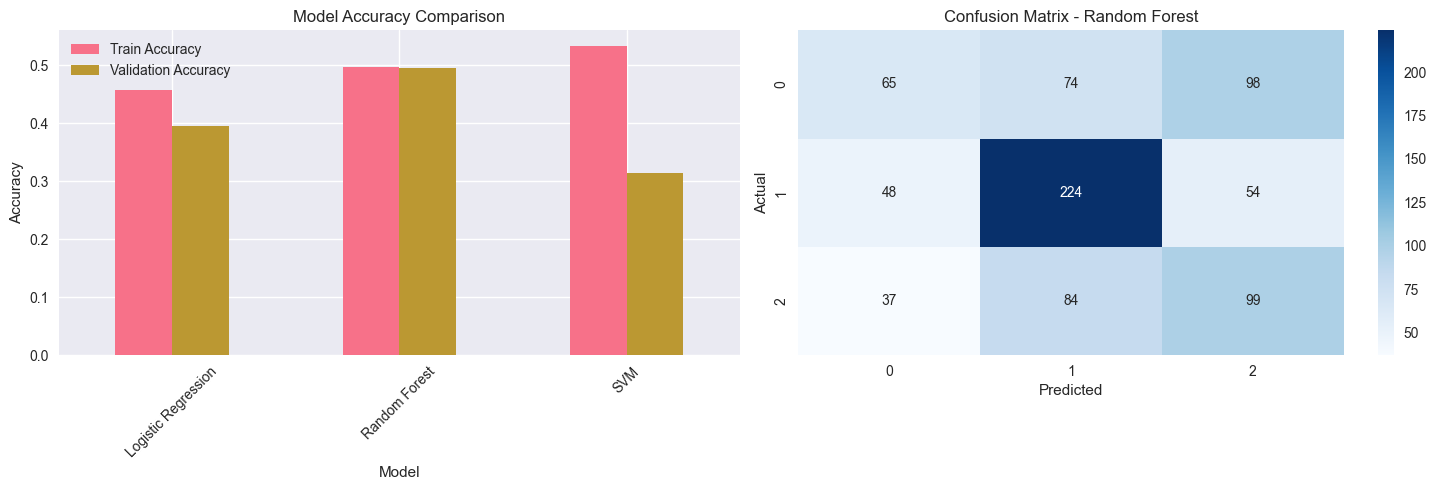


Best Model: Random Forest
Classification Report for Random Forest:
              precision    recall  f1-score   support

          -1       0.43      0.27      0.34       237
           0       0.59      0.69      0.63       326
           1       0.39      0.45      0.42       220

    accuracy                           0.50       783
   macro avg       0.47      0.47      0.46       783
weighted avg       0.49      0.50      0.48       783



In [288]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train Accuracy': [results[model]['train_accuracy'] for model in results.keys()],
    'Validation Accuracy': [results[model]['val_accuracy'] for model in results.keys()]
})

print("Model Comparison:")
print(comparison_df)

# Visualize comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy comparison
comparison_df.set_index('Model')[['Train Accuracy', 'Validation Accuracy']].plot(
    kind='bar', ax=ax1, title='Model Accuracy Comparison'
)
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.set_xticklabels(comparison_df['Model'], rotation=45)

# Best model confusion matrix
best_model_name = comparison_df.loc[comparison_df['Validation Accuracy'].idxmax(), 'Model']
best_predictions = results[best_model_name]['val_predictions']

cm = confusion_matrix(y_val, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title(f'Confusion Matrix - {best_model_name}')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

print(f"\nBest Model: {best_model_name}")
print(f"Classification Report for {best_model_name}:")
print(classification_report(y_val, best_predictions))

In [289]:
# Test the best model on test set
best_model = results[best_model_name]['model']
test_predictions = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Final Test Accuracy ({best_model_name}): {test_accuracy:.4f}")
print("\nFinal Test Classification Report:")
print(classification_report(y_test, test_predictions))

Final Test Accuracy (Random Forest): 0.4534

Final Test Classification Report:
              precision    recall  f1-score   support

          -1       0.23      0.06      0.10       229
           0       0.34      0.12      0.17       191
           1       0.48      0.88      0.62       363

    accuracy                           0.45       783
   macro avg       0.35      0.35      0.30       783
weighted avg       0.38      0.45      0.36       783



# 5. AI Tooling Reflection

## AI Tools Used
- **Gemini:** Considerations regarding the time frame of training data, validation data & test data. Splitting data sets. Error management and explanations of what is happening.

## Impact on Development
- **Speed:** It improved speed. 
- **Learning:** It helped me understand that some issues I had with the model was due to a lack of sample size of certain labels, and that I could improve my model by reducing labels.
- **Challenges:** It gives a very good learning to time ratio, but you would probably learn more by getting through documentation etc. It would just take 5x longer to do.

## Code Generated with AI
Gemini helped me split the data chronologically instead of randomly in section 2.

# 6. Conclusions

## Key Findings
- Finding 1 - On many days the market is not doing much
- Finding 2 - Overperformance is created by accurately predicting the periods where something is actually happening. My model was pretty good at predicting when nothing is happening but the upside to that is limited

## Model Performance Summary
- **Best Model:** Random forest with 45.3% test accuracy
- **Key Factors:** Catches non-linearity. Robust against overfitting and noise. 

## Limitations
- Labelling precision

## Future Work
- Experiment more with labelling -> testing different strategies
- Systematic hyperparameter tuning to find the optimal set of parameters
- Try a Gradient Boosting Machine model
- Use another "start of position"-price than closing to set the model up for taking automated trades

## Broader Implications
Building a market screener or automated trading system